In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#own modules / functions
import sys

pythonPackagePath = "/Users/johannesschoeneberg/git/pyLattice/src/python/"
sys.path.append(pythonPackagePath+"/modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append(pythonPackagePath+"/classes")
import Track

In [3]:
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_cutoff7000/_inputParameters.csv',names=['key','value'])
inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_DMSO_cutoff7000_bleachCorrected/_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)



5689.0


In [4]:
path = outputDataFolder+'/'+master_outputDataFolder+'/'
#path = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/"
filename = "puncta_03.csv"
data = pd.read_csv(path+"/"+filename,header=0)
data.columns = ["x","y","z","A"]
print(len(data))
data[0:5]

6442


,x,y,z,A
0,3.297318,470.4565,2.974783,9870.960
1,11.962080,472.9509,3.680016,10848.940
2,16.955630,475.7755,3.990090,11904.100
3,38.104300,533.2216,2.621055,8800.096
4,52.105940,207.7313,3.075043,11886.260


In [5]:
data.iloc[0].values

array([  3.29731800e+00,   4.70456500e+02,   2.97478300e+00,
         9.87096000e+03])

[ 9.19735239  9.29182266  9.38463816 ...,  9.10721059  9.04868413
  9.30178673]
6442


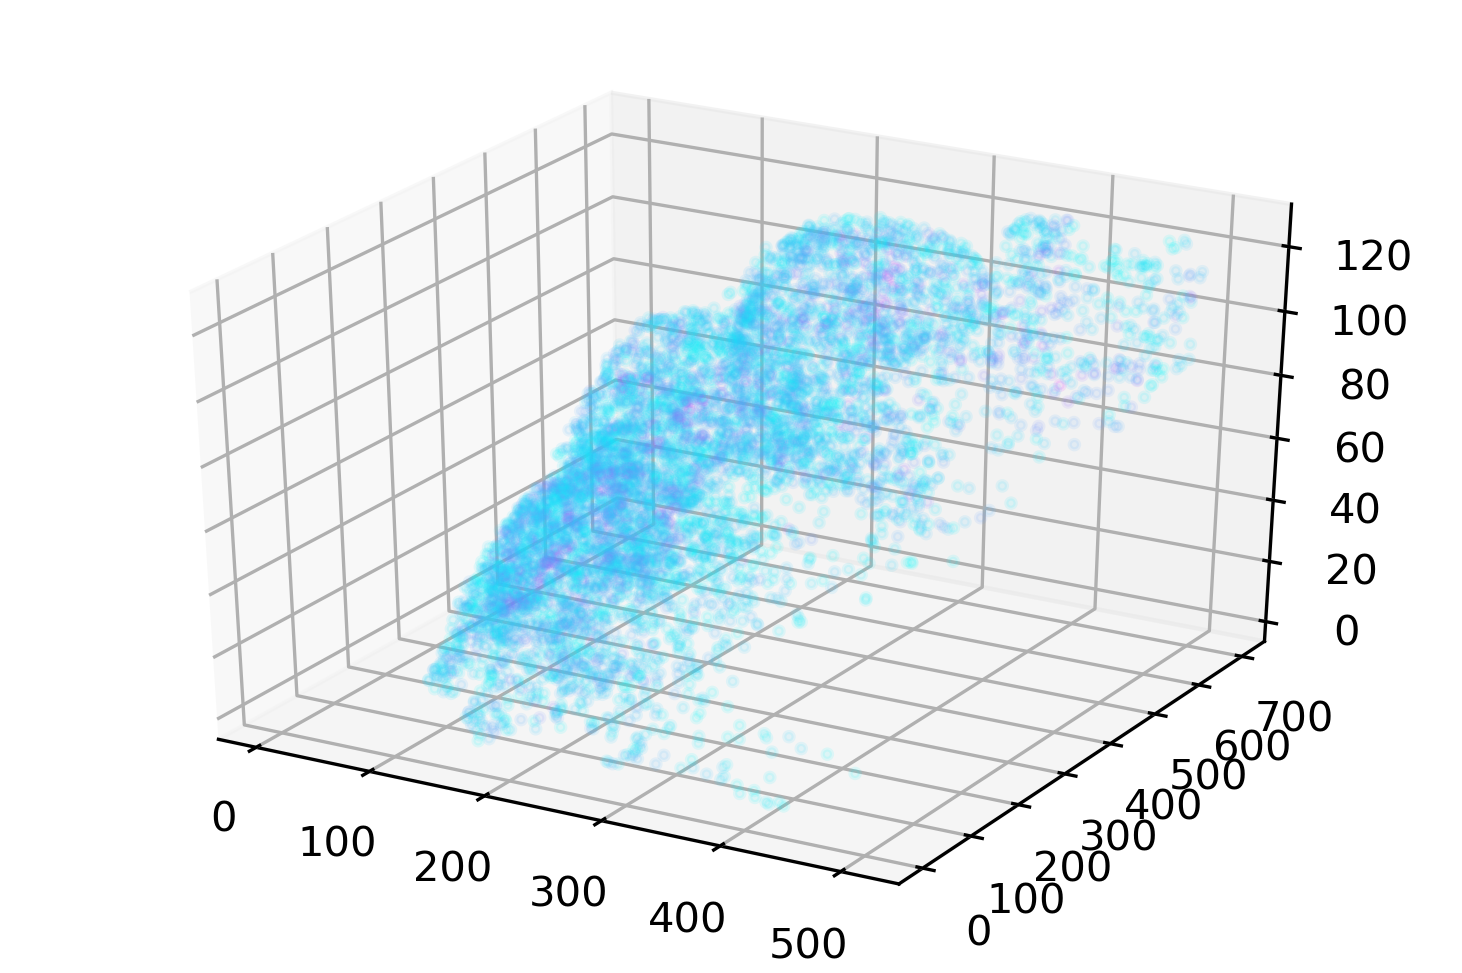

In [6]:
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
#    plt.title(title)
    # Data for a three-dimensional line
    x = data['x'].values[0:100000]
    y = data['y'].values[0:100000]
    z = data['z'].values[0:100000]
    intensity = data['A'].values[0:100000]
    print(np.log(intensity))
    print(len(intensity))
#    ax.plot3D(x, y, z, 'gray')
    ax.scatter3D(x, y, z, c=np.log(intensity), cmap='cool',alpha=0.1,s=5);

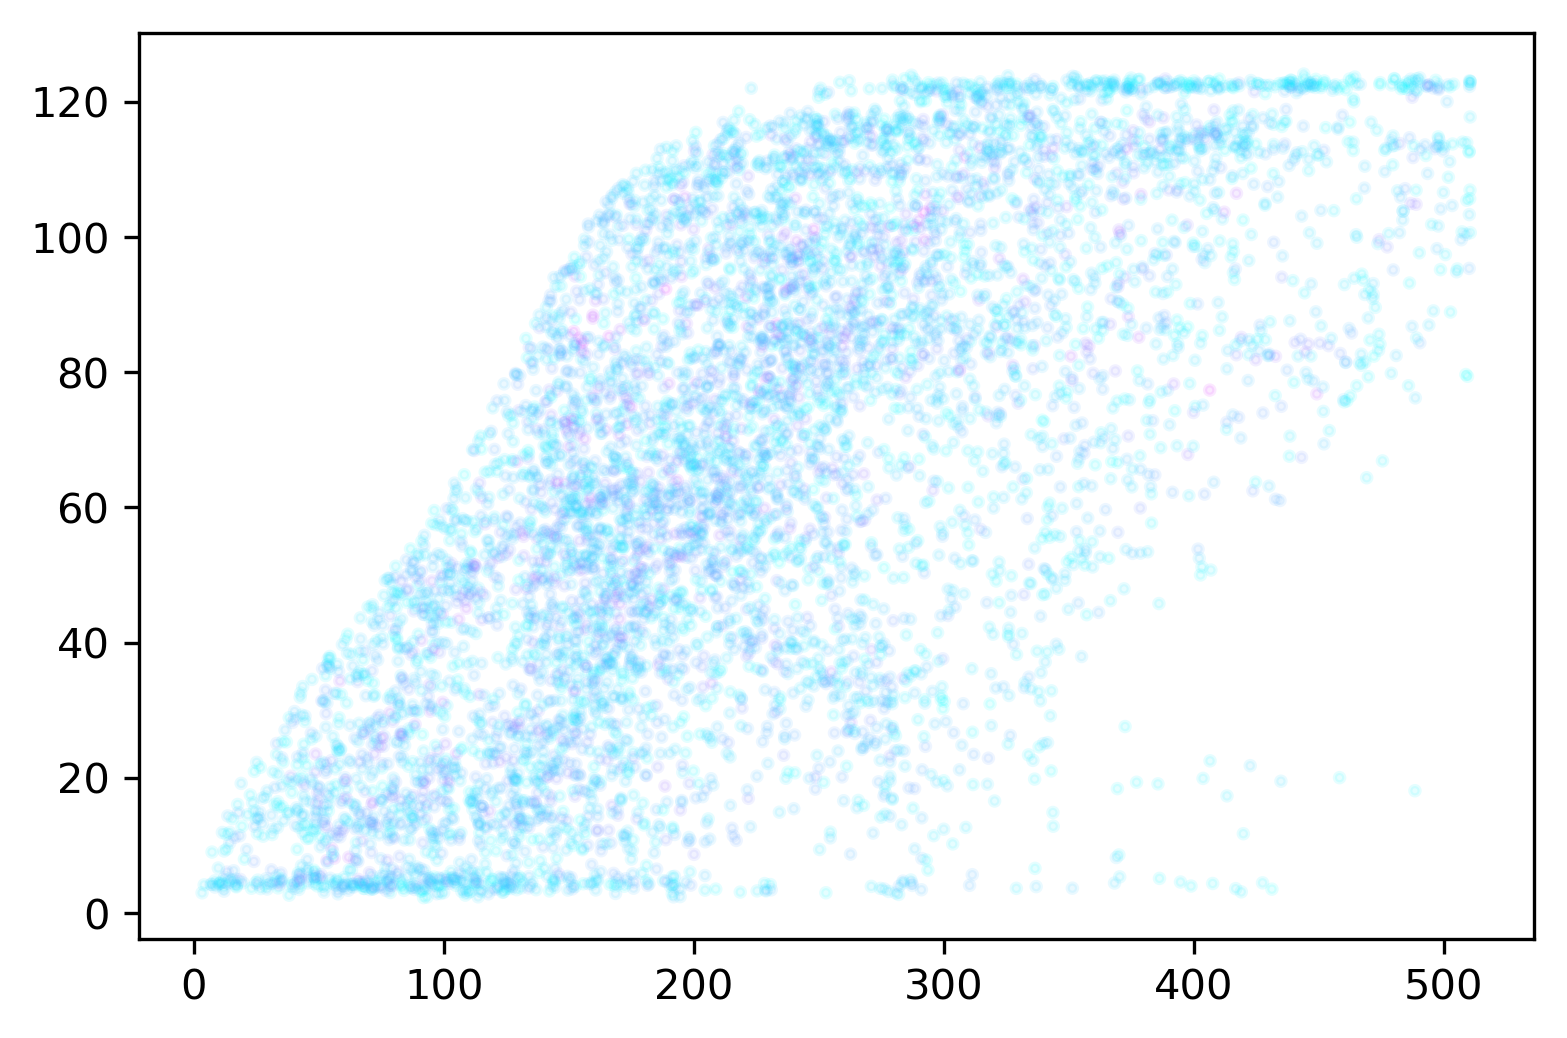

In [8]:
    plt.figure(dpi=300)
    ax = plt.axes()
#    plt.title(title)
    # Data for a three-dimensional line
    x = data['x'].values[0:100000]
    y = data['y'].values[0:100000]
    z = data['z'].values[0:100000]
    intensity = data['A'].values[0:100000]
#    ax.plot3D(x, y, z, 'gray')
#    ax.scatter(x, y, c=intensity, cmap='cool',alpha=0.1,s=1);
    ax.scatter(x, z, c=np.log(intensity), cmap='cool',alpha=0.1,s=5);

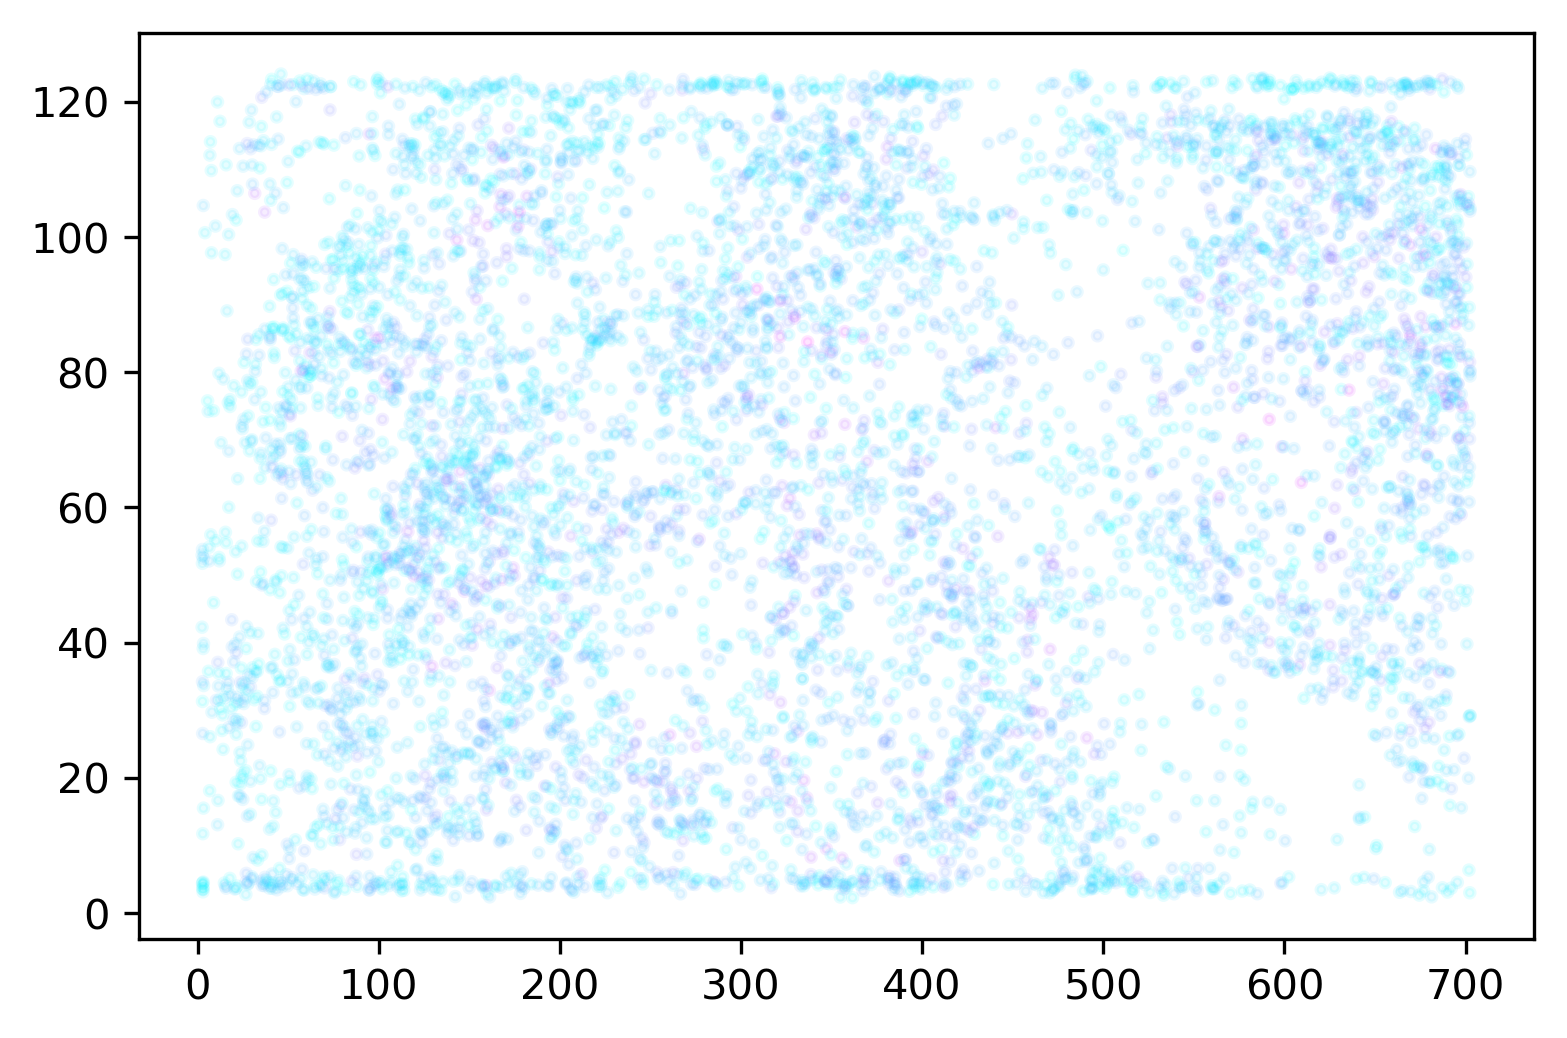

In [7]:
    plt.figure(dpi=300)
    ax = plt.axes()
#    plt.title(title)
    # Data for a three-dimensional line
    x = data['x'].values[0:100000]
    y = data['y'].values[0:100000]
    z = data['z'].values[0:100000]
    intensity = data['A'].values[0:100000]
#    ax.plot3D(x, y, z, 'gray')
#    ax.scatter(x, y, c=intensity, cmap='cool',alpha=0.1,s=1);
    ax.scatter(y, z, c=np.log(intensity), cmap='cool',alpha=0.1,s=5);

In [33]:
# get all puncta

idx = data.index[data['A'] > 0]

x = ((data['x']).loc[idx])
y = ((data['y']).loc[idx])
z = ((data['z']).loc[idx])

yrange = [np.min(y),np.max(y)]
xrange = [np.min(x),np.max(x)]
print(yrange)
print(xrange)
yrange = [0,700]
xrange = [0,500]
nbins = 20
xbinsize = (yrange[1]-yrange[0])/nbins
ybinsize = (xrange[1]-xrange[0])/nbins

xbins = np.arange(xrange[0], xrange[1]+1, binsize )
ybins = np.arange(yrange[0], yrange[1]+1, binsize )
zValues = []
print(bins)
for i in range(1,len(xbins)):
    for j in range(1,len(ybins)):
        xleftThreshold = xbins[i-1]
        xrightThreshold = xbins[i]
        yleftThreshold = ybins[j-1]
        yrightThreshold = ybins[j]
        
        #filter out the z's that have the correct x range
        idx = data.index[(data['y'] > yleftThreshold)&(data['y'] < yrightThreshold)&(data['x'] > xleftThreshold)&(data['x'] < xrightThreshold)] 
        z = ((data['z']).loc[idx])
        zValues.append([xleftThreshold,xrightThreshold,yleftThreshold,yrightThreshold,z.values])
    
#print(zValues)
averageZs = []
for zValuePerBin in zValues:
    averageZs.append(np.array([zValuePerBin[0]+(zValuePerBin[1]-zValuePerBin[0])/2,zValuePerBin[2]+(zValuePerBin[3]-zValuePerBin[2])/2,np.average(zValuePerBin[-1])]))

averageZs = np.array(averageZs)
#print(averageZs)

#plt.plot(np.array(bins[0:-1])+binsize/2,averageZs)

[2.5234330000000003, 702.53510000000006]
[3.2973180000000002, 510.63569999999999]
[   0.   70.  140.  210.  280.  350.  420.  490.  560.  630.  700.]


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


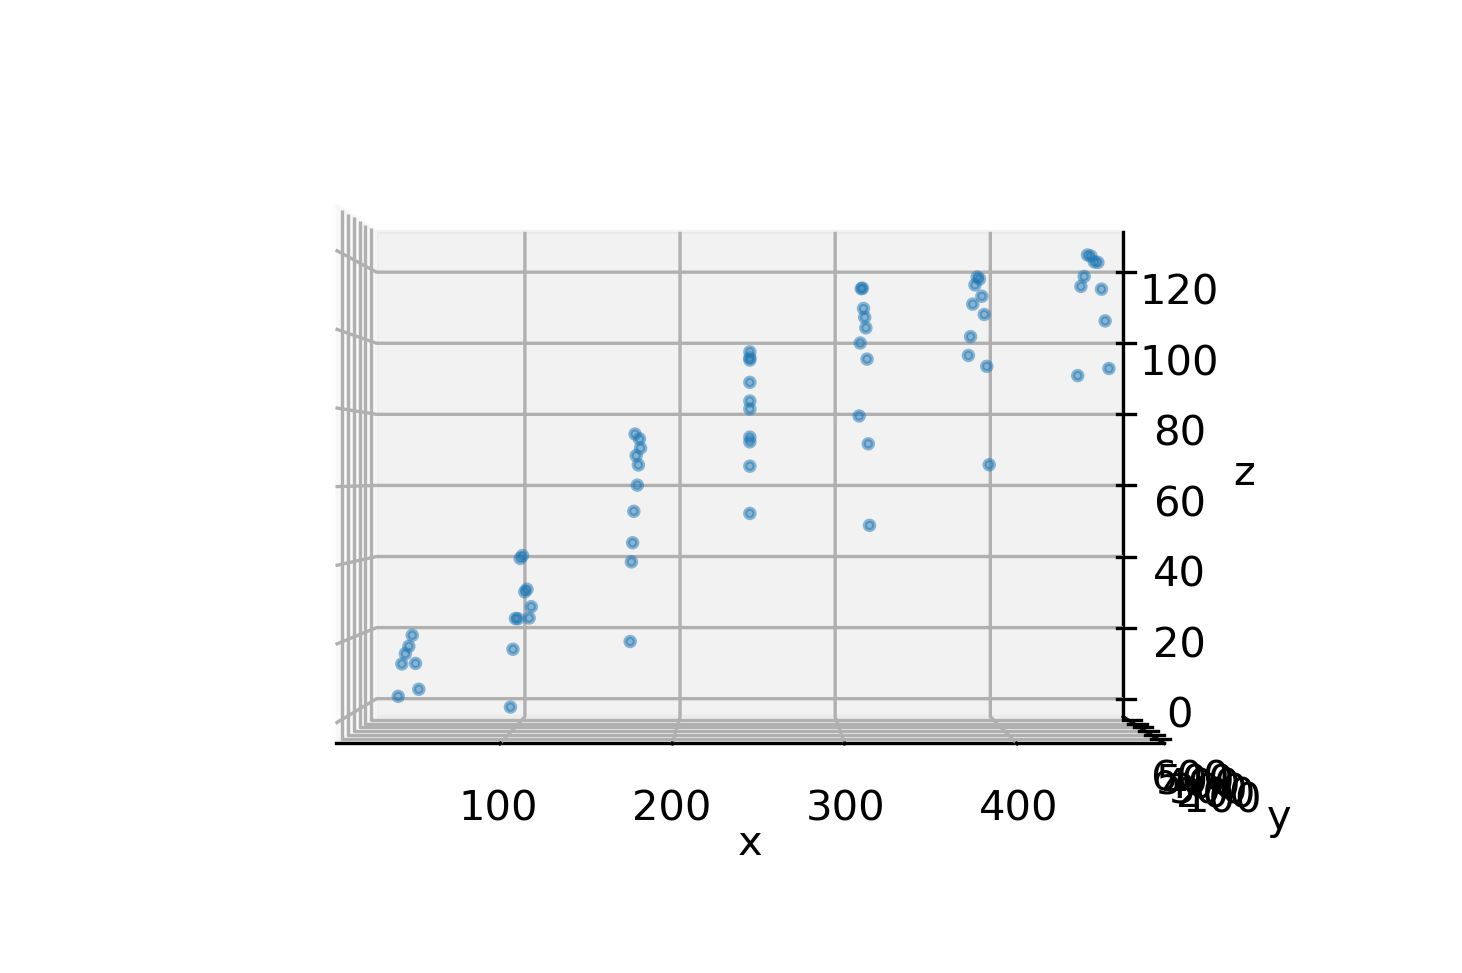

In [34]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
#X, Y, Z = axes3d.get_test_data(0.1)
#ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)




plt.figure(dpi=300)
ax = plt.axes(projection='3d')
#    plt.title(title)
# Data for a three-dimensional line
x = averageZs[:,0]
y = averageZs[:,1]
z = averageZs[:,2]

#    ax.plot3D(x, y, z, 'gray')
ax.scatter3D(x, y, z, cmap='cool',alpha=0.5,s=5);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
xangle = 0
yangle = -90
ax.view_init(xangle, yangle)
    
# rotate the axes and update
#for angle in range(0, 360):
#    
#    plt.draw()
#    plt.pause(.001)

92


Text(0.5,1,'frame 01')

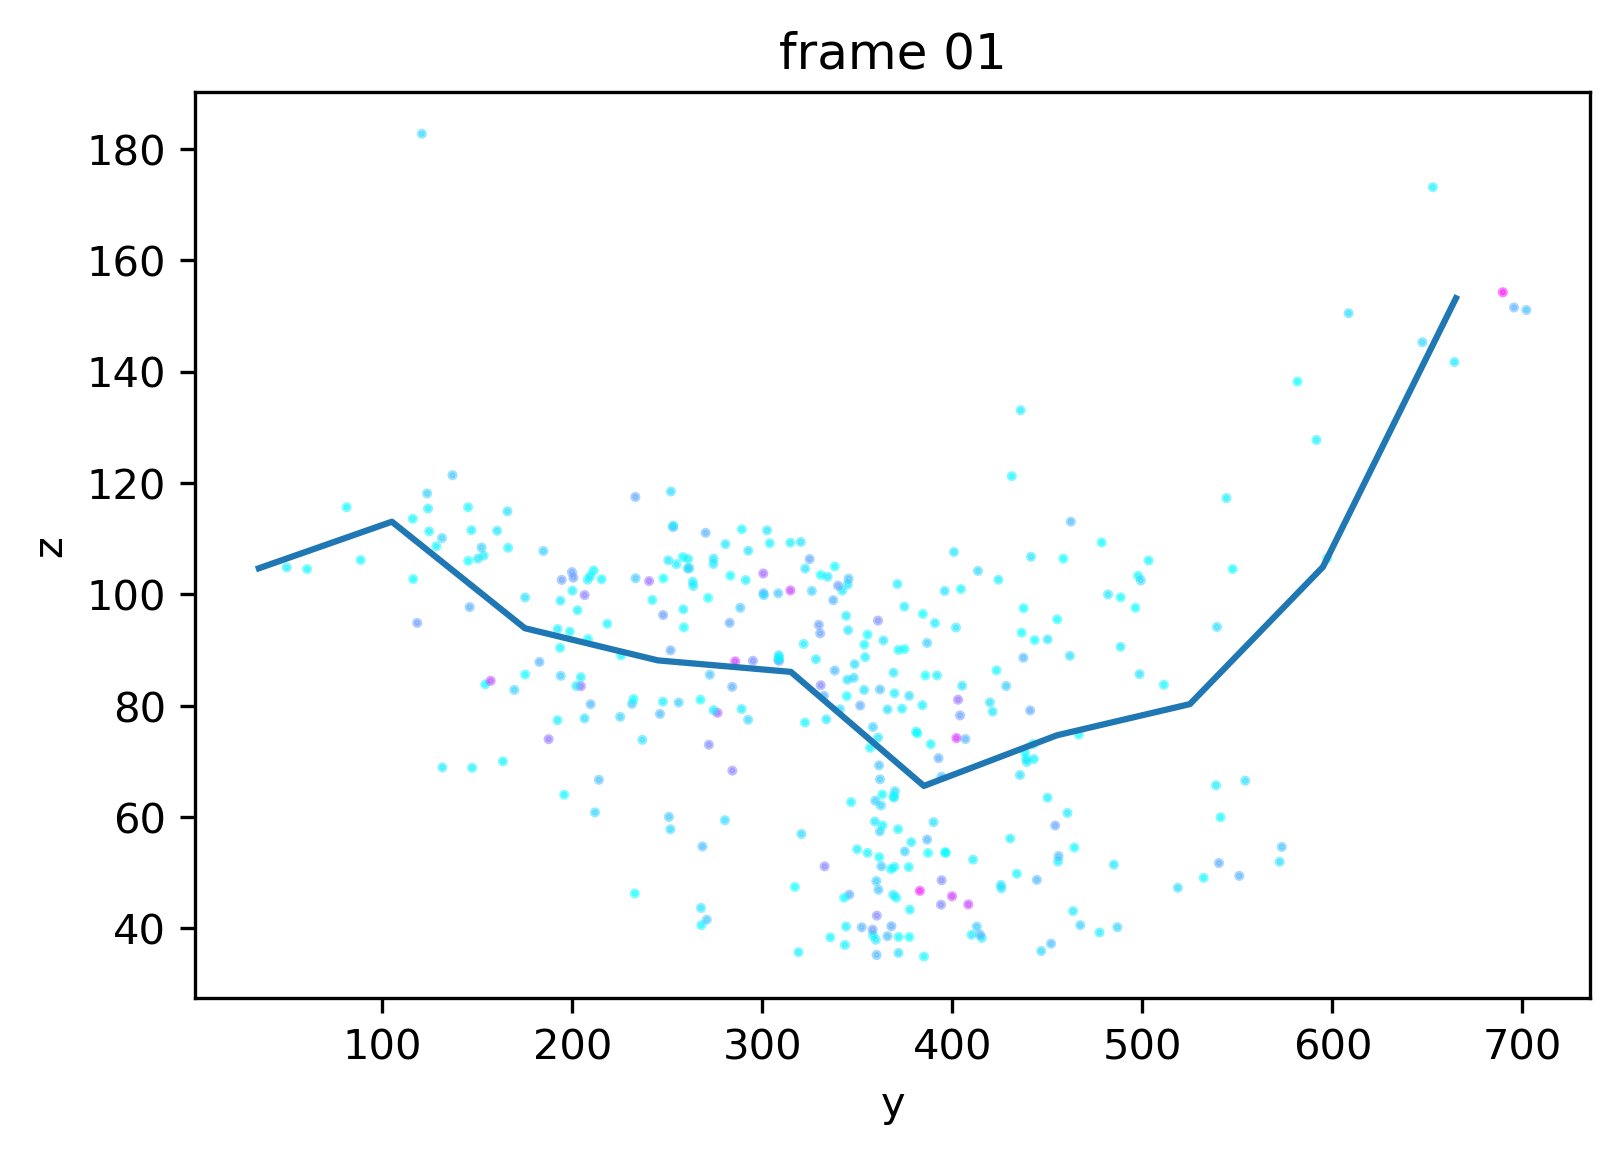

In [61]:
#%matplotlib notebook


idx = data.index[data['A'] > 10000]
print(len(idx))


#df.loc[idx]

plt.figure(dpi=300)
plt.plot(np.array(bins[0:-1])+binsize/2,averageZs)
#ax = plt.axes()
#    plt.title(title)
    # Data for a three-dimensional line
idx = data.index[data['A'] > 0]
x = ((data['x']).loc[idx])
y = ((data['y']).loc[idx])
z = ((data['z']).loc[idx])

intensity = ((data['A']).loc[idx])
#    y = data['y'].values[0:100000]
#    z = data['z'].values[0:100000]
#    intensity = data['A'].values[0:100000]
#    ax.plot3D(x, y, z, 'gray')
plt.scatter(y, z, c=intensity, cmap='cool',alpha=0.5,s=2);
plt.xlabel("y")
plt.ylabel("z")
#plt.ylim(0,200)
plt.title("frame 01")




In [ ]:
# do it for all frames

/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


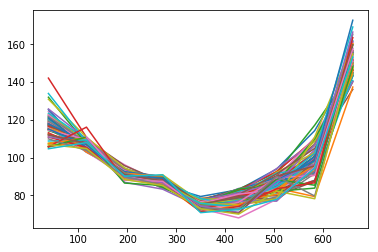

In [80]:
path = outputDataFolder+'/'+master_outputDataFolder+'/'
#path = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/"

allAverageZs = []
for i in range(1,71):
        
    filename = "puncta_"+str(i).zfill(2)+".csv"
    data = pd.read_csv(path+"/"+filename,header=0)
    data.columns = ["x","y","z","A"]
    
    # get all puncta
    
    idx = data.index[data['A'] > 0]
    
    x = ((data['x']).loc[idx])
    y = ((data['y']).loc[idx])
    z = ((data['z']).loc[idx])
    
    yrange = [0,700]
    nbins = 9
    binsize = (yrange[1]-yrange[0])/nbins

    bins = np.arange(yrange[0], yrange[1]+1, binsize )
    zValues = []
    #print(bins)
    for i in range(1,len(bins)):
        leftThreshold = bins[i-1]
        rightThreshold = bins[i]
        #filter out the z's that have the correct x range
        idx = data.index[(data['y'] > leftThreshold)&(data['y'] < rightThreshold)] 
        z = ((data['z']).loc[idx])
        zValues.append(z.values)
        
    #print(zValues)
    averageZs = []
    for zValuePerBin in zValues:
        averageZs.append(np.average(zValuePerBin))
    
    #print(averageZs)
    allAverageZs.append(averageZs)
    plt.plot(np.array(bins[0:-1])+binsize/2,averageZs)


In [76]:
np.nanmean(allAverageZs[0:-1],axis=0)

array([ 117.30371435,  106.8935544 ,   91.49227078,   87.08214307,
         75.58176287,   78.57998916,   85.43989849,   97.97795952,
        151.08614626])

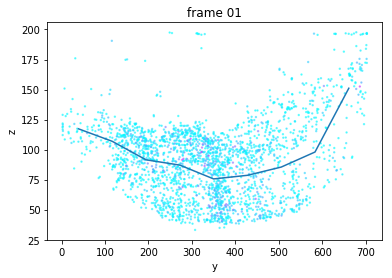

In [78]:
path = outputDataFolder+'/'+master_outputDataFolder+'/'
#path = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/"
filename = "puncta_01.csv"
data = pd.read_csv(path+"/"+filename,header=0)
data.columns = ["x","y","z","A"]
idx = data.index[data['A'] > 0]
x = ((data['x']).loc[idx])
y = ((data['y']).loc[idx])
z = ((data['z']).loc[idx])
intensity = ((data['A']).loc[idx])
plt.scatter(y, z, c=intensity, cmap='cool',alpha=0.5,s=2);
plt.xlabel("y")
plt.ylabel("z")
#plt.ylim(0,200)
plt.title("frame 01")
plt.plot(np.array(bins[0:-1])+binsize/2,np.nanmean(allAverageZs[0:-1],axis=0))

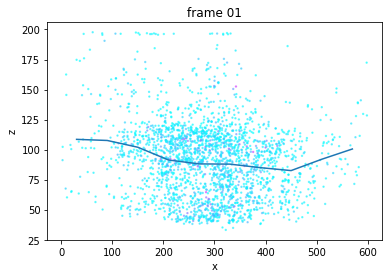

In [51]:
path = outputDataFolder+'/'+master_outputDataFolder+'/'
#path = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/"
filename = "puncta_01.csv"
data = pd.read_csv(path+"/"+filename,header=0)
data.columns = ["x","y","z","A"]
idx = data.index[data['A'] > 0]
x = ((data['x']).loc[idx])
y = ((data['y']).loc[idx])
z = ((data['z']).loc[idx])
plt.scatter(x, z, c=intensity, cmap='cool',alpha=0.5,s=2);
plt.xlabel("x")
plt.ylabel("z")
#plt.ylim(0,200)
plt.title("frame 01")
plt.plot(np.array(bins[0:-1])+binsize/2,[ 108.51764415,  107.59988712,  101.94423844,   91.3324129 ,
         88.07240251,   87.9015554 ,   84.9491272 ,   82.514857  ,
         91.95023042,  100.5])

Text(0,0.5,'y')

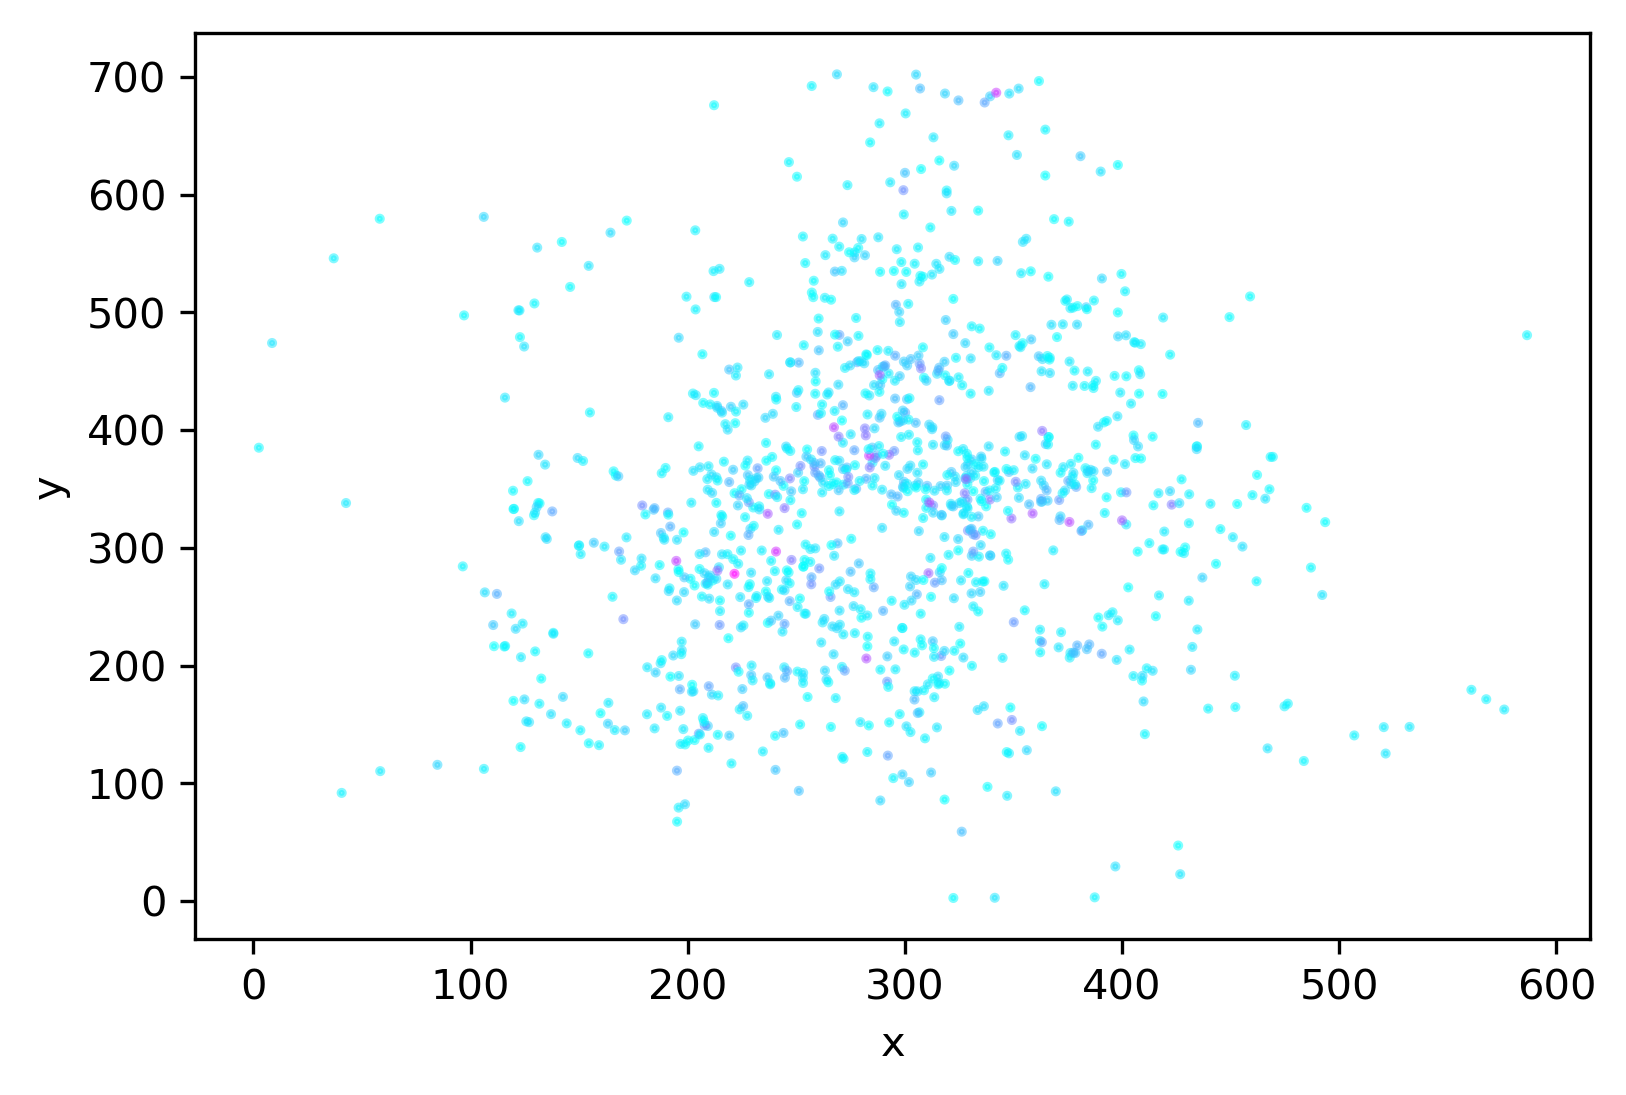

In [10]:
#%matplotlib notebook

idx = data.index[data['A'] > 1]


#df.loc[idx]

plt.figure(dpi=300)
#ax = plt.axes()
#    plt.title(title)
    # Data for a three-dimensional line
x = ((data['x']).loc[idx])
y = ((data['y']).loc[idx])
z = ((data['z']).loc[idx])
intensity = ((data['A']).loc[idx])
#    y = data['y'].values[0:100000]
#    z = data['z'].values[0:100000]
#    intensity = data['A'].values[0:100000]
#    ax.plot3D(x, y, z, 'gray')
plt.scatter(x, y, c=intensity, cmap='cool',alpha=0.5,s=2);
plt.xlabel("x")
plt.ylabel("y")
#plt.ylim(0,200)



3000 3000
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999],
           dtype='int64', length=3000)


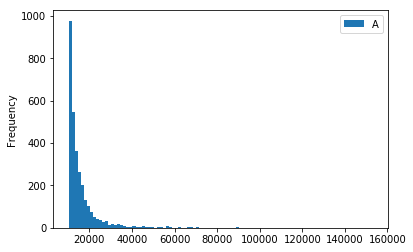

In [53]:
data[['A']].plot.hist(bins=100)
print(len(data['A']),len(idx))
print(idx)